In [32]:
import numpy as np
from scipy.linalg import fractional_matrix_power, eigh
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll

### **Diffusion Map algorithm**

---



In [33]:
# dataMatrix two dimensional
# X = [x1 x2 x3]^T where x1 is a row-vector
def getDistanceMap(dataMatrix):
  return distance_matrix(dataMatrix, dataMatrix)

In [34]:
def getKernelMatrix(distances, eps):
  return np.exp(-np.square(distances) / eps)

In [35]:
def getDiagonalNormMatrix(kernel):
  summed = np.sum(kernel, axis=1)
  return np.identity(len(summed)) * np.outer(np.ones(len(summed)), summed)

In [36]:
def diffusionMap(dataMatrix, l):
  distanceMap = getDistanceMap(dataMatrix)
  eps = 0.05 * max(distanceMap.flatten())
  kernel_w = getKernelMatrix(distanceMap, eps)
  diag_p = getDiagonalNormMatrix(kernel_w)
  diag_p_inv = fractional_matrix_power(diag_p, -1)
  kernel_norm_k = diag_p_inv @ kernel_w @ diag_p_inv
  diag_norm_q = getDiagonalNormMatrix(kernel_norm_k)
  diag_norm_q_trans = fractional_matrix_power(diag_norm_q, -0.5)
  symmetric_t = diag_norm_q_trans @ kernel_norm_k @ diag_norm_q_trans
  dim_symm = len(symmetric_t)
  eigenvalues_a, eigenvectors_v = eigh(symmetric_t, eigvals=[dim_symm - l - 1, dim_symm - 1])
  
  compute_eigenvalues = np.vectorize(lambda x: x ** (1 / eps))
  used_eigenvalues_squared = compute_eigenvalues(eigenvalues_a)

  used_eigenvectors = np.apply_along_axis(lambda x: diag_norm_q_trans @ x, 0, eigenvectors_v)

  return used_eigenvalues_squared, used_eigenvectors

### **Part One**
---

In [37]:
N = 1000
generate_tk = np.vectorize(lambda x: 2 * np.pi * x / (N + 1))
tk = generate_tk(np.arange(1, N + 1))
X = np.array([[np.cos(t), np.sin(t)] for t in tk])

In [38]:
l = 5
_, eigenfunctions = diffusionMap(X, l)

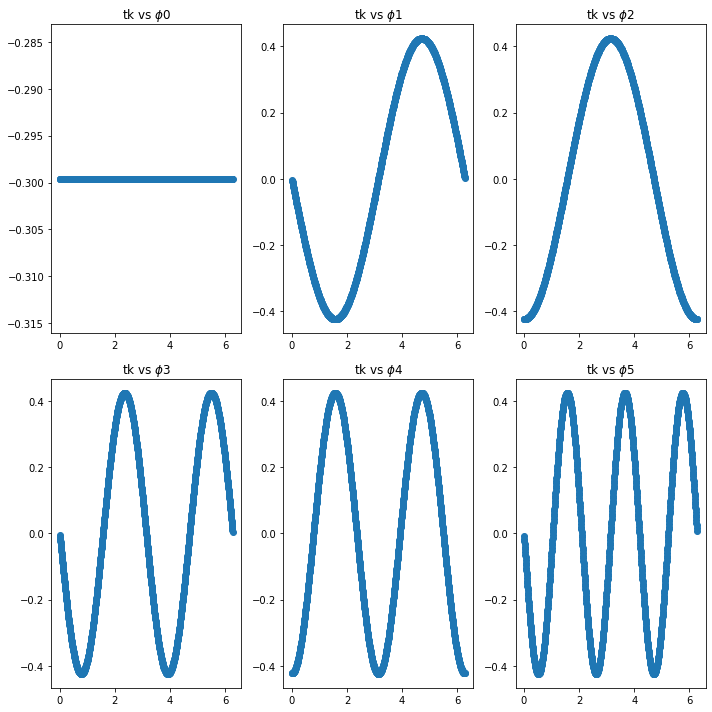

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3)

getvector_by_index = lambda index: np.around(eigenfunctions[:, -index], decimals=4)
for index, ax in enumerate(axes.flatten()):
  ax.scatter(tk, getvector_by_index(index + 1))
  ax.figure.set_size_inches(10, 10)
  ax.set_title(rf'tk vs $\phi{index}$')

plt.tight_layout()

### **Part Two**

---



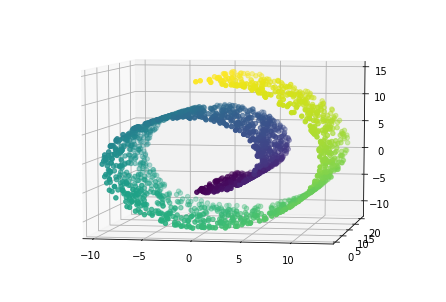

In [42]:
n_samples = 2000
X, t = make_swiss_roll(n_samples)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t)

l = 10
eigenvalues_squared, eigenfunctions = diffusionMap(X, l)

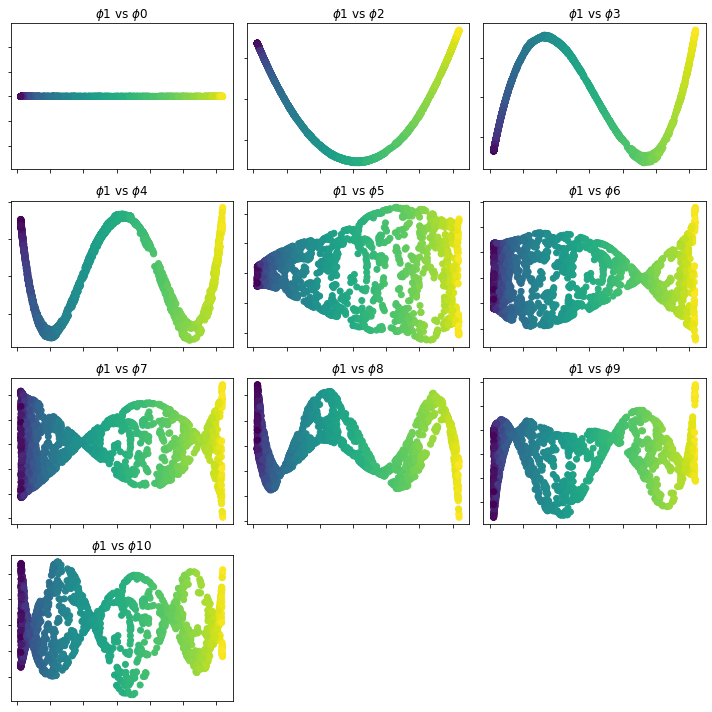

In [43]:
fig, axes = plt.subplots(nrows=int(np.ceil(l / 3.0)), ncols=3)

getvector_by_index = lambda index: np.around(eigenfunctions[:, -index], decimals=4)
phi_one = getvector_by_index(2)
for index, ax in enumerate(axes.flatten()[:l]):
  if index == 0:
    index_label = 0
    phi_index = getvector_by_index(1)
  else:
    index_label = index + 1
    phi_index = getvector_by_index(index + 2)
  ax.scatter(phi_one, phi_index, c=t)
  ax.figure.set_size_inches(10, 10)
  ax.xaxis.set_ticklabels([])
  ax.yaxis.set_ticklabels([])
  ax.set_title(rf'$\phi 1$ vs $\phi{index_label}$')

for i in range(0, -l % 3):
  fig.delaxes(axes[-1][-i - 1])
plt.tight_layout()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.39542319 0.32786282 0.27671399]
[[-0.55696697 -0.0909214  -0.82554291]
 [ 0.7740297   0.30354299 -0.55564348]
 [ 0.30110765 -0.94846979 -0.09868755]]


### **Part Three**
---

In [103]:
f = open('data_DMAP_PCA_vadere.txt', 'r')
content = f.readlines()

data_set = list()
for line in content:
  line = line[:-1].split(' ')
  time_step = list(line)
  data_set.append(time_step)
data_set = np.array(data_set, dtype='float64')

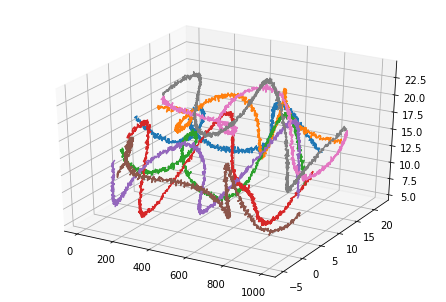

In [122]:
fig = plt.figure()
ax = p3.Axes3D(fig)
time_finish = 1000
time = np.linspace(0, time_finish, time_finish)
for i in range(8):
  ax.plot(time, data_set[:, 2*i][:time_finish], data_set[:, 2*i + 1][:time_finish])
#ax.plot(time, data_set[:, 2][:time_finish], data_set[:, 3][:time_finish])
#ax.plot(time, data_set[:, 4][:time_finish], data_set[:, 5][:time_finish])


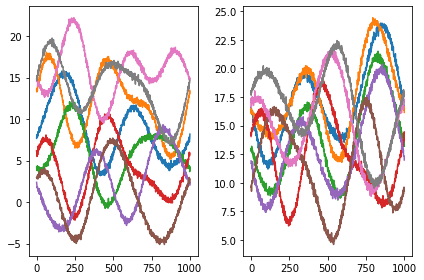

In [129]:
fig, [ax, ax1] = plt.subplots(nrows=1, ncols=2)
#ax = p3.Axes3D(fig)
time_finish = 1000
time = np.linspace(0, time_finish, time_finish)
for i in range(8):
  ax.plot(time, data_set[:, 2*i][:time_finish])
  ax1.plot(time, data_set[:, 2*i+1][:time_finish])

plt.tight_layout()

In [118]:
pca = PCA(n_components=30)
pca.fit(data_set)
print(pca.explained_variance_ratio_)
#print(pca.components_)
sum(pca.explained_variance_ratio_[:3])

[4.73305613e-01 3.75940810e-01 1.47884612e-01 1.40702494e-04
 1.37385953e-04 1.33375245e-04 1.29740484e-04 1.27407321e-04
 1.25722158e-04 1.19015271e-04 1.15982777e-04 1.15048557e-04
 1.13552057e-04 1.11815219e-04 1.09396288e-04 1.08556499e-04
 1.05745000e-04 1.03758284e-04 1.00619676e-04 9.84589371e-05
 9.76594405e-05 9.49393251e-05 9.21460848e-05 9.02639325e-05
 8.71216980e-05 8.59756356e-05 8.59079712e-05 8.33963713e-05
 8.11034307e-05 7.41697607e-05]


0.9971310341299295

In [119]:
l = 10
eigenvalues_squared, eigenfunctions = diffusionMap(data_set, l)

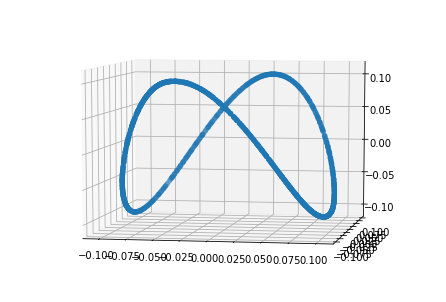

In [124]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(eigenfunctions[:, -2], eigenfunctions[:,-3], eigenfunctions[:,-4])